### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Packages import and setting up of dataframe

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [3]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [4]:
regress_df =  pd.read_csv('Twitter.data',header=None,names=columns,index_col=False)

### Exploration of Dataset

-  #### Description of Dataset

In [5]:
regress_df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


-  #### Check for NULL values

In [6]:
regress_df.isnull().values.any()

False

No missing values in the dataset

-  #### Checking for skewness in data

In [7]:
dataregcols = list(regress_df.columns)

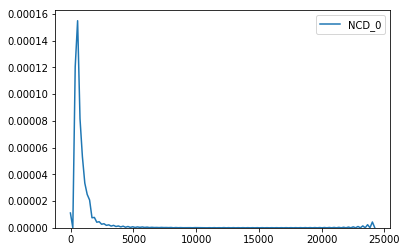

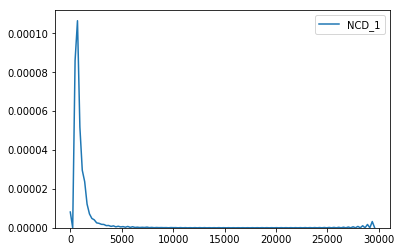

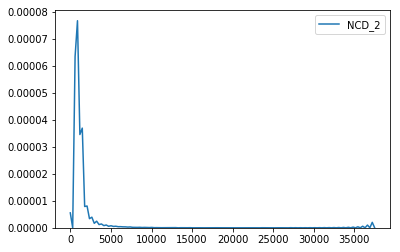

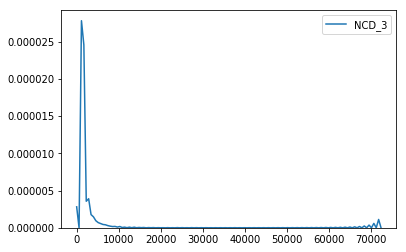

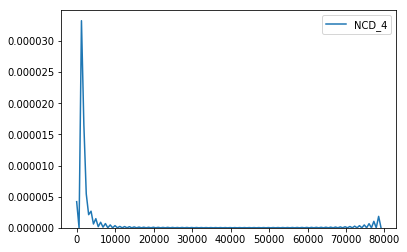

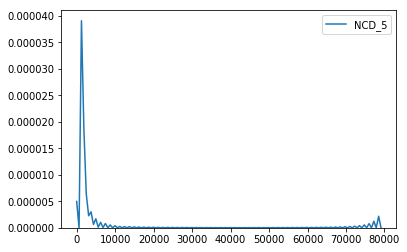

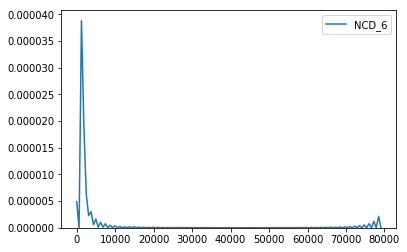

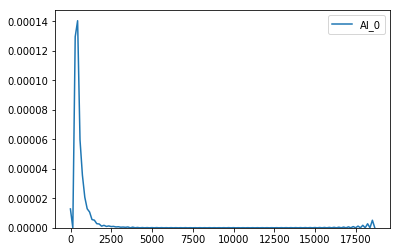

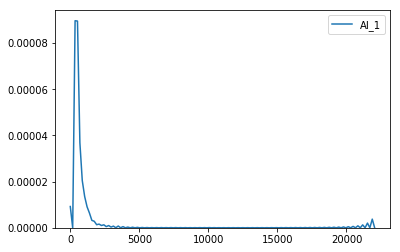

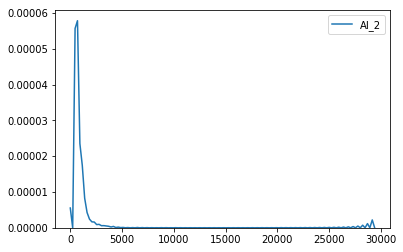

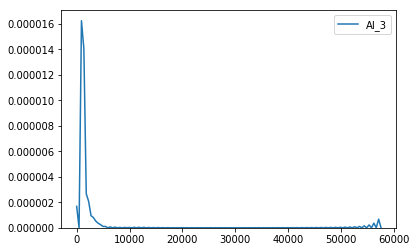

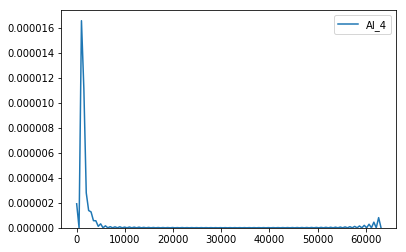

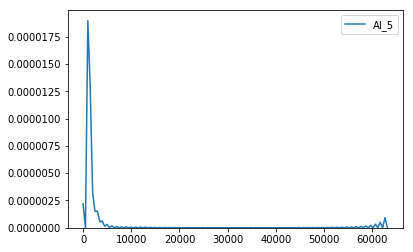

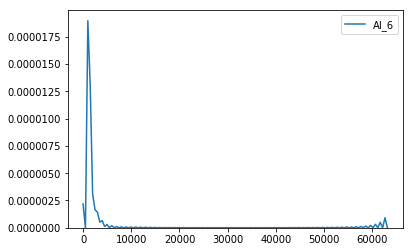

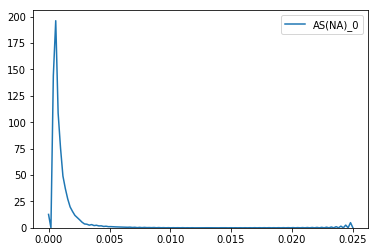

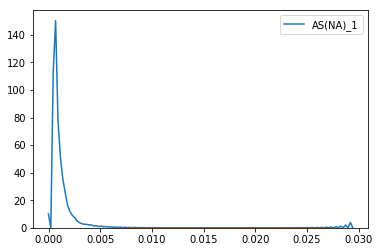

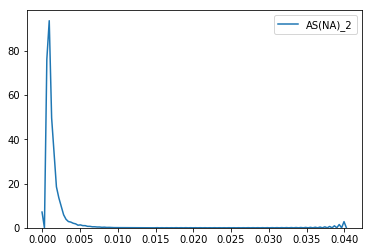

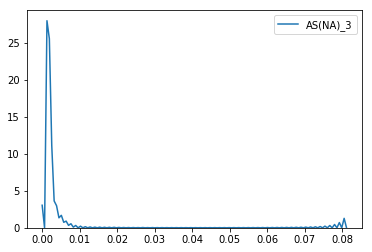

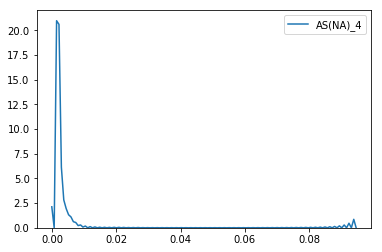

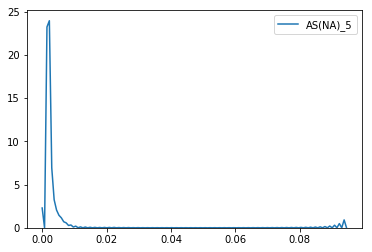

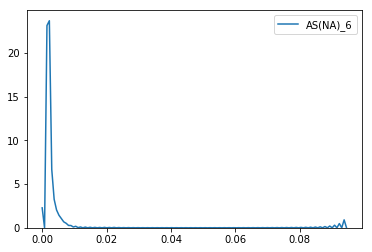

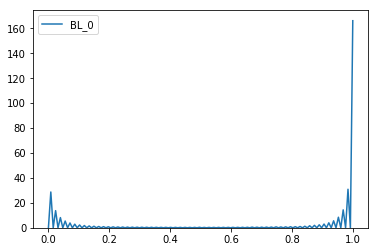

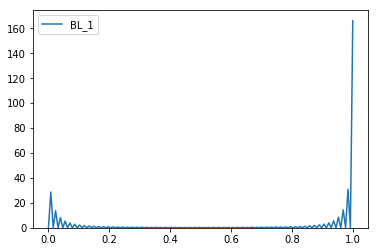

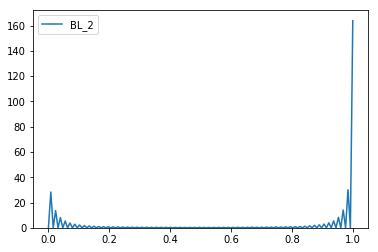

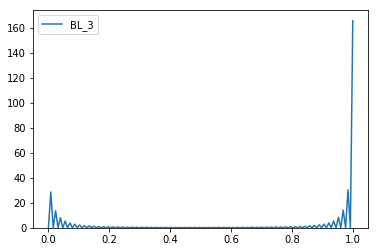

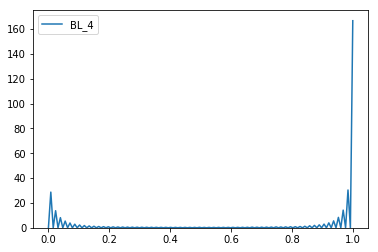

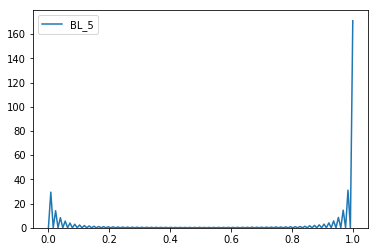

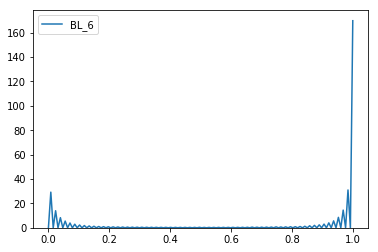

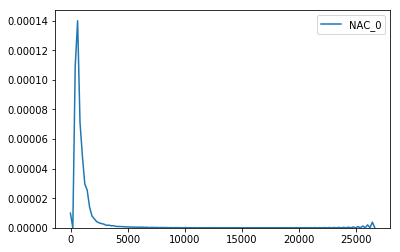

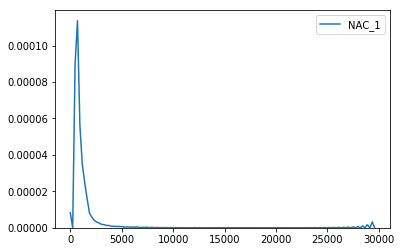

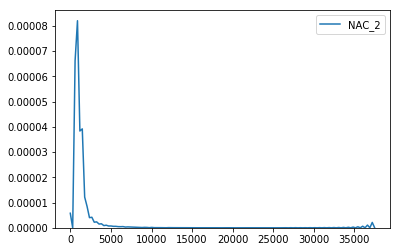

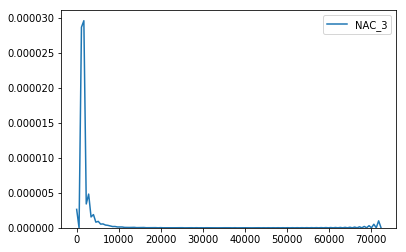

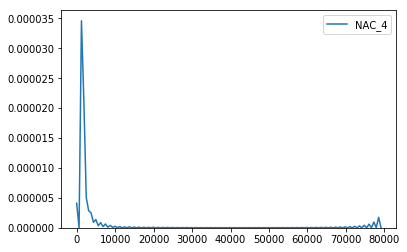

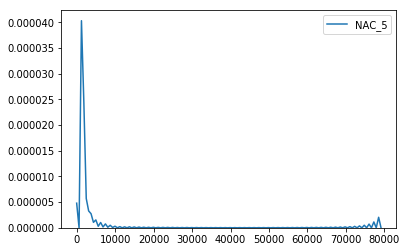

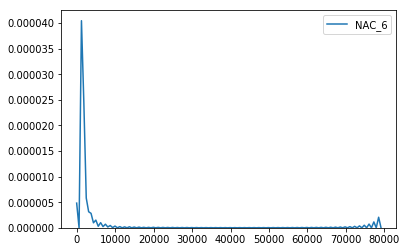

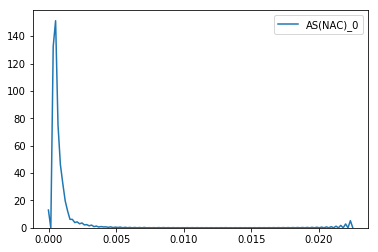

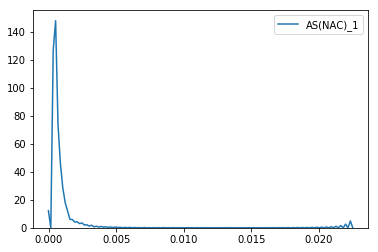

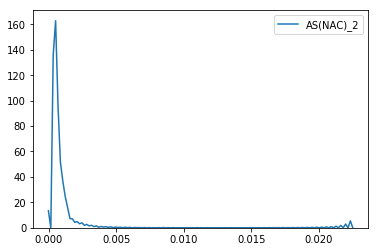

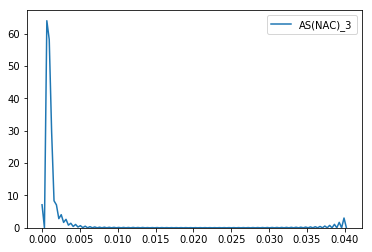

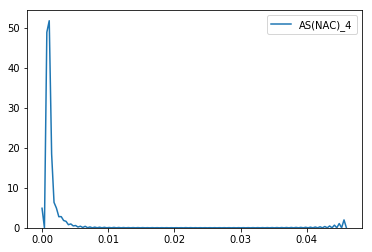

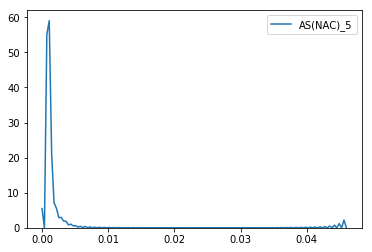

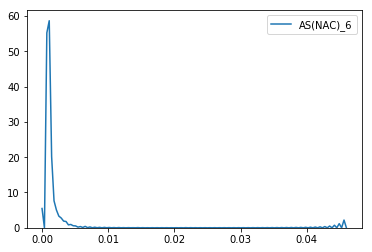

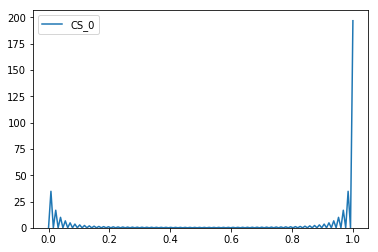

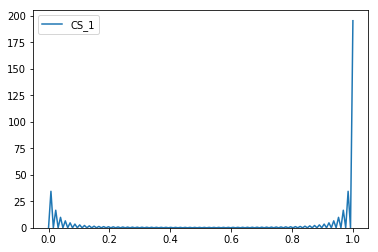

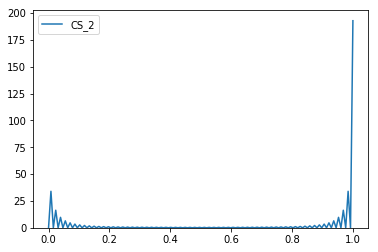

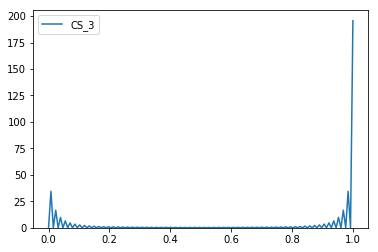

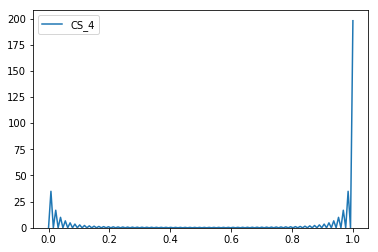

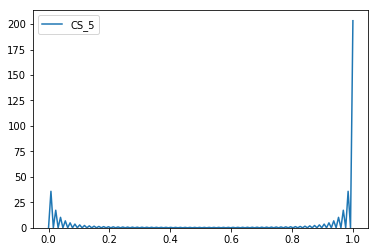

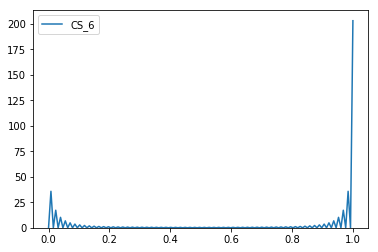

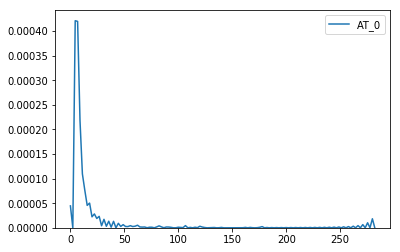

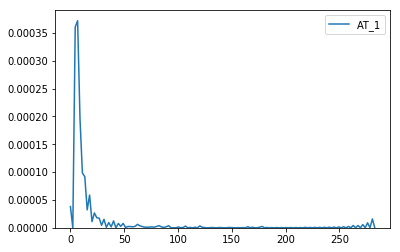

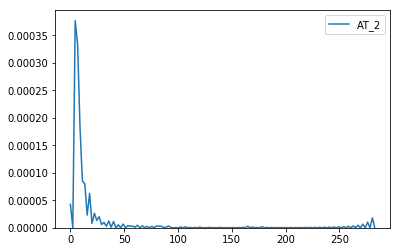

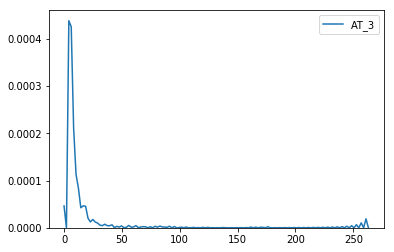

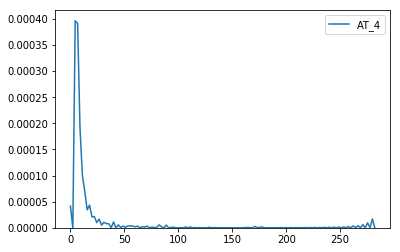

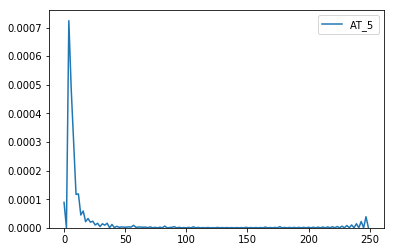

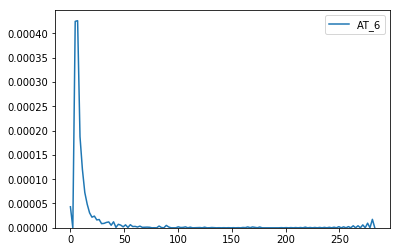

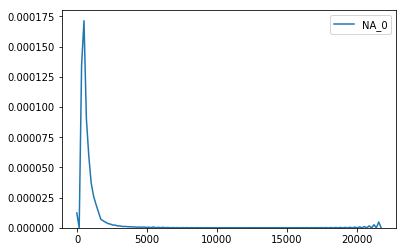

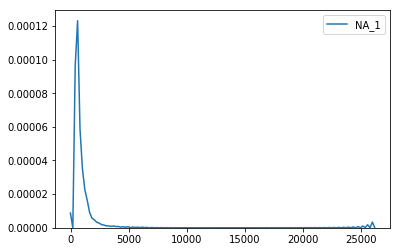

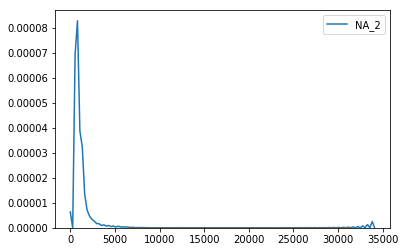

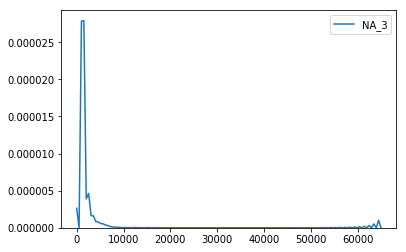

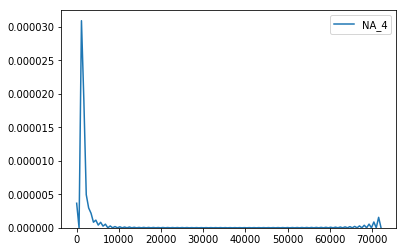

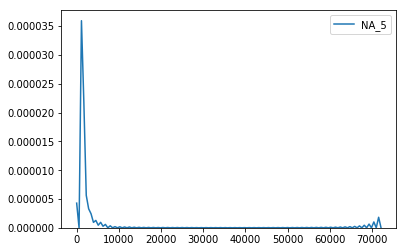

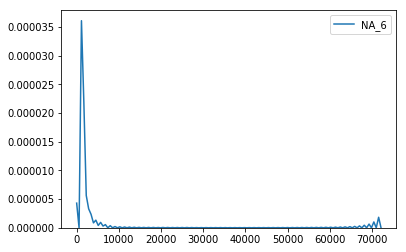

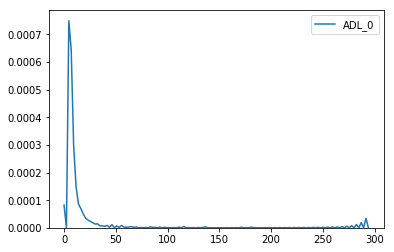

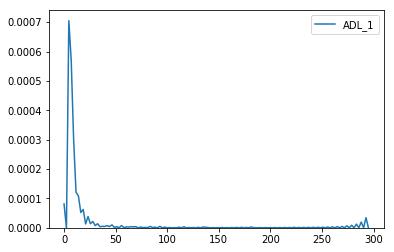

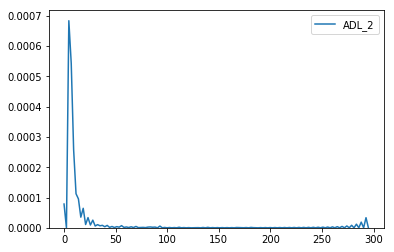

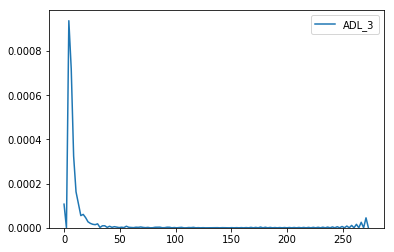

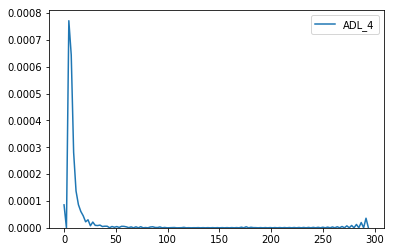

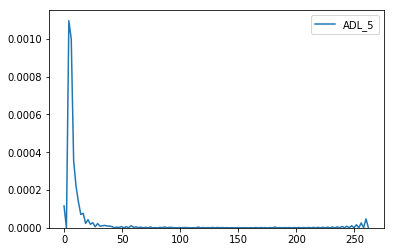

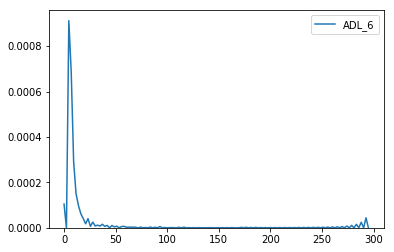

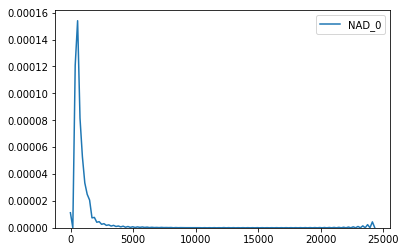

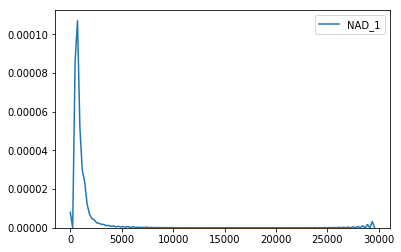

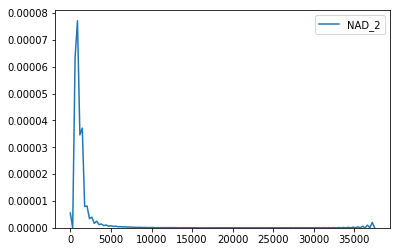

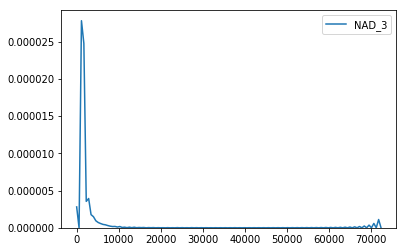

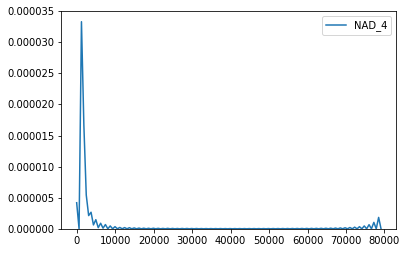

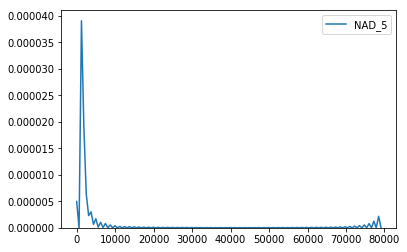

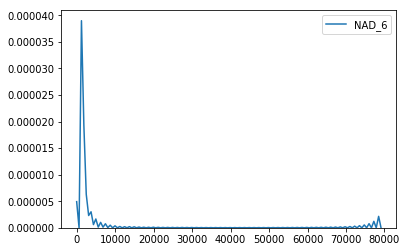

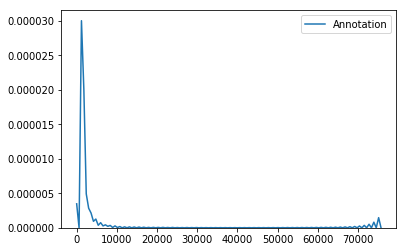

In [8]:
for i in dataregcols:
        sns.kdeplot(regress_df[i])
        plt.show()

Plots indicate the presence of skewness in data

### Evaluation Strategy

Accuracy Score ($R^2$)- This score gives us an indication of how much variance in the dependent variable is explained by features. It always lies in between 0 and 1. Close to 0 indicates that the model is bad. Close to 1 indicates that the model is good.

### Extracting 10% of data with shuffling

In [5]:
X = regress_df.iloc[:,0:77]
y =regress_df['Annotation']
_, part_data, _, part_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state=8)

In [6]:
part_target.value_counts()

0.5        2119
1.0        1980
0.0        1913
1.5        1732
2.0        1491
2.5        1327
3.0        1169
3.5        1116
4.0        1014
4.5        864 
5.0        828 
5.5        758 
6.0        682 
6.5        604 
7.0        587 
8.0        544 
7.5        538 
9.0        482 
8.5        478 
10.0       471 
9.5        433 
12.0       398 
11.5       393 
10.5       374 
11.0       363 
13.5       356 
12.5       350 
14.5       331 
14.0       306 
16.5       306 
          ...  
1218.0     1   
1113.5     1   
2113.5     1   
1689.0     1   
783.5      1   
1278.5     1   
1718.0     1   
2090.0     1   
3705.5     1   
4523.0     1   
2852.0     1   
1327.0     1   
698.0      1   
3498.0     1   
886.0      1   
1560.5     1   
973.0      1   
2938.5     1   
1651.0     1   
1338.0     1   
1432.0     1   
868.5      1   
852.0      1   
2263.0     1   
7868.0     1   
1439.0     1   
12775.0    1   
14166.5    1   
3253.5     1   
1446.5     1   
Name: Annotation, Length

### Creating Train-Test Split

In [7]:
## Train and Test dataset for the cross-validation and Grid Search models
X_train_part, X_test_part, y_train, y_test = train_test_split(part_data, part_target, test_size = 0.2,random_state=8)

### Data Scaling

MinMax scaler is used to make the data consistent in such a way that all data is brought into the range of 0 to 1. It does not remove the skewness in the data. But it reduces it

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_part)
X_test = scaler.transform(X_test_part)

### Bagging

Bagging (stands for Bootstrap Aggregating) is a way to decrease the variance of your prediction by generating additional data for training from your original dataset using combinations with repetitions to produce multisets of the same cardinality/size as your original data. By increasing the size of your training set you can't improve the model predictive force, but just decrease the variance, narrowly tuning the prediction to expected outcome.

### Bagging - Linear Regression

In [13]:
from sklearn.ensemble import BaggingRegressor

In [14]:
linearreg_reg= LinearRegression(fit_intercept=False, normalize=True)
bag_reg_linearreg = BaggingRegressor(linearreg_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=8)

bag_reg_linearreg.fit(X_train, y_train)
y_pred = bag_reg_linearreg.predict(X_test)

In [15]:
linearreg_bag_accuracy_train = bag_reg_linearreg.score(X_train, y_train)
linearreg_bag_accuracy_test = bag_reg_linearreg.score(X_test, y_test)

print('Linear Regression (Bagging) - Train Accuracy: %.2f'%linearreg_bag_accuracy_train)
print('Linear Regression (Bagging) - Test Accuracy: %.2f '%linearreg_bag_accuracy_test)

Linear Regression (Bagging) - Train Accuracy: 0.92
Linear Regression (Bagging) - Test Accuracy: 0.92 


### Bagging - KNN Regression

In [16]:
kreg = KNeighborsRegressor(n_neighbors=2)
bag_reg_kreg = BaggingRegressor(kreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=8)

bag_reg_kreg.fit(X_train, y_train)
y_pred = bag_reg_kreg.predict(X_test)

In [17]:
kreg_bag_accuracy_train = bag_reg_kreg.score(X_train, y_train)
kreg_bag_accuracy_test = bag_reg_kreg.score(X_test, y_test)

print('KNN Regression (Bagging) - Train Accuracy: %.2f'%kreg_bag_accuracy_train)
print('KNN Regression (Bagging) - Test Accuracy: %.2f '%kreg_bag_accuracy_test)

KNN Regression (Bagging) - Train Accuracy: 0.49
KNN Regression (Bagging) - Test Accuracy: 0.62 


### Pasting

Pasting is same as bagging - only difference being that pasting doesn’t allow training instances to be sampled several times for the same predictors.

### Pasting - Linear Regression

In [18]:
linearreg_reg= LinearRegression(fit_intercept=False, normalize=True)
paste_reg_linearreg = BaggingRegressor(linearreg_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=8)

paste_reg_linearreg.fit(X_train, y_train)
y_pred = paste_reg_linearreg.predict(X_test)

In [19]:
linearreg_past_accuracy_train = paste_reg_linearreg.score(X_train, y_train)
linearreg_past_accuracy_test = paste_reg_linearreg.score(X_test, y_test)

print('Linear Regression (Pasting) - Train Accuracy: %.2f'%linearreg_past_accuracy_train)
print('Linear Regression (Pasting) - Test Accuracy: %.2f '%linearreg_past_accuracy_test)

Linear Regression (Pasting) - Train Accuracy: 0.92
Linear Regression (Pasting) - Test Accuracy: 0.92 


### Pasting - KNN Regression

In [20]:
kreg= KNeighborsRegressor(n_neighbors=2)
paste_reg_knn = BaggingRegressor(kreg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=8)

paste_reg_knn.fit(X_train, y_train)
y_pred = paste_reg_knn.predict(X_test)

In [21]:
kreg_past_accuracy_train = paste_reg_knn.score(X_train, y_train)
kreg_past_accuracy_test = paste_reg_knn.score(X_test, y_test)

print('KNN Regression (Pasting) - Train Accuracy: %.2f'%kreg_past_accuracy_train)
print('KNN Regression (Pasting) - Test Accuracy: %.2f '%kreg_past_accuracy_test)

KNN Regression (Pasting) - Train Accuracy: 0.49
KNN Regression (Pasting) - Test Accuracy: 0.62 


### Ada-Boost

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

### Ada Boost - Linear Regression

In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
linearreg_reg= LinearRegression(fit_intercept=False, normalize=True)
adab_reg_linearreg = AdaBoostRegressor(linearreg_reg, n_estimators=200, learning_rate=0.5, random_state=8)
adab_reg_linearreg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=8)

In [24]:
linearreg_adab_accuracy_train = adab_reg_linearreg.score(X_train, y_train)
linearreg_adab_accuracy_test = adab_reg_linearreg.score(X_test, y_test)

print('Linear Regression (Ada Boost) - Train Accuracy: %.2f'%linearreg_adab_accuracy_train)
print('Linear Regression (Ada Boost) - Test Accuracy: %.2f '%linearreg_adab_accuracy_test)

Linear Regression (Ada Boost) - Train Accuracy: 0.91
Linear Regression (Ada Boost) - Test Accuracy: 0.81 


### Ada Boost - Ridge Regression

In [25]:
ridgereg = Ridge(alpha=0.1, fit_intercept=False, normalize=True,random_state=8)
adab_reg_ridge = AdaBoostRegressor(ridgereg, n_estimators=200, learning_rate=0.5, random_state=8)
adab_reg_ridge.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=8, solver='auto', tol=0.001),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=8)

In [26]:
ridge_adab_accuracy_train = adab_reg_ridge.score(X_train, y_train)
ridge_adab_accuracy_test = adab_reg_ridge.score(X_test, y_test)

print('Ridge Regression (Ada Boost) - Train Accuracy: %.2f'%ridge_adab_accuracy_train)
print('Ridge Regression (Ada Boost) - Test Accuracy: %.2f '%ridge_adab_accuracy_test)

Ridge Regression (Ada Boost) - Train Accuracy: 0.90
Ridge Regression (Ada Boost) - Test Accuracy: 0.83 


### Gradient Boosting - Regression

Similar to AdaBoost, Gradient Boosting also works with successive predictive models added to the ensemble. Instead of updating the weights of the training instances like AdaBoost, Gradient Boosting fits the new model to the residual errors.

Gradient Boosting

1. Fit a model to the given Training set.
2. Calculate the Residual Errors which become the new training instances.
3. A new model is trained on these and so on.
4. An addition of all the models is selected for making predictions.

In [27]:
from  sklearn.ensemble import GradientBoostingRegressor

In [28]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=8)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=8, subsample=1.0,
             verbose=0, warm_start=False)

In [29]:
gbrt_accuracy_train = gbrt.score(X_train, y_train)
gbrt_accuracy_test = gbrt.score(X_test, y_test)

print('Linear Regression (Ada Boost) - Train Accuracy: %.2f'%gbrt_accuracy_train)
print('Linear Regression (Ada Boost) - Test Accuracy: %.2f '%gbrt_accuracy_test)

Linear Regression (Ada Boost) - Train Accuracy: 0.88
Linear Regression (Ada Boost) - Test Accuracy: 0.84 


### Principal Component Analysis

Principal Component Analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features.

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=20)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[37.25 53.95 64.65 74.37 83.18 91.1  96.6  98.92 99.05 99.14 99.22 99.3
 99.38 99.45 99.52 99.58 99.64 99.69 99.73 99.77]


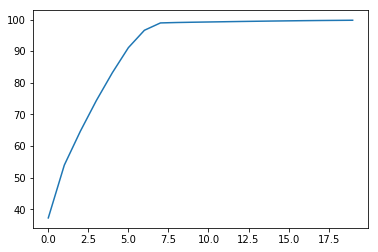

In [11]:
plt.plot(var1)
plt.show()

In [12]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

7

In [13]:
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Grid Search and Cross Validation

Cross-validation is a method for robustly estimating test-set performance (generalization) of a model. 

Grid-search is a way to select the best of a family of models, parametrized by a grid of parameters.

### Linear Regression - Grid Search and Cross Validation

In a cause and effect relationship, the independent variable is the cause, and the dependent variable is the effect. Least squares linear regression is a method for predicting the value of a dependent variable Y, based on the value of an independent variable X.

The dependent variable Y has a linear relationship to the independent variable X

In [35]:
linearreg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

linearreg_grid_search = GridSearchCV(linearreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
linearreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(linearreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(linearreg_grid_search.best_score_))

Best parameters: {'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.02


In [36]:
linearreg_accuracy_train = linearreg_grid_search.best_estimator_.score(X_train_pca, y_train)
linearreg_accuracy_test = linearreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Regression - Train Accuracy: %.2f'%linearreg_accuracy_train)
print('Linear Regression - Test Accuracy: %.2f '%linearreg_accuracy_test)

Linear Regression - Train Accuracy: 0.02
Linear Regression - Test Accuracy: 0.03 


In [37]:
report_table = [['Linear Regression', str(linearreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),linearreg_accuracy_train,linearreg_accuracy_test ]]

### KNN Regression - Grid Search and Cross Validation

K Nearest Neighbors is a simple algorithm that stores all available cases and regresses new cases based on a similarity measure (e.g., distance functions). The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [38]:
kreg = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(1,11,1)}

kreg_grid_search = GridSearchCV(kreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
kreg_grid_search.fit(X_train_pca, y_train)

print("Best parameters: {}".format(kreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(kreg_grid_search.best_score_))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.86


In [39]:
# Create a list of the mean scores only
# List comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in kreg_grid_search.grid_scores_]

# Plot the results cross-validation accuracy
plt.plot(np.arange(1,11,1), grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

/home/maheedar001/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

In [40]:
kreg_accuracy_train = kreg_grid_search.best_estimator_.score(X_train_pca, y_train)
kreg_accuracy_test = kreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('KNN Regression - Train Accuracy: %.2f'%kreg_accuracy_train)
print('KNN Regression - Test Accuracy: %.2f '%kreg_accuracy_test)

KNN Regression - Train Accuracy: 0.89
KNN Regression - Test Accuracy: 0.85 


In [41]:
report_table = report_table + [['KNN Regression', str(kreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),kreg_accuracy_train,kreg_accuracy_test ]]

### SGD Regression - Grid Search and Cross Validation

Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [42]:
sgdreg=SGDRegressor(random_state=8)
parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'], 'penalty':[None,'l2','l1','elasticnet'],'alpha':[0.0001,0.001,0.01,0.05,0.1,1,10],'learning_rate':['constant','optimal','invscaling'] }

sgdreg_grid_search = GridSearchCV(sgdreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
sgdreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(sgdreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(sgdreg_grid_search.best_score_))

Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'l1'}
Best cross-validation score: 0.02


In [43]:
sgdreg_accuracy_train = sgdreg_grid_search.best_estimator_.score(X_train_pca, y_train)
sgdreg_accuracy_test = sgdreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('SGD Regression - Train Accuracy: %.2f'%sgdreg_accuracy_train)
print('SGD Regression - Test Accuracy: %.2f '%sgdreg_accuracy_test)

SGD Regression - Train Accuracy: 0.02
SGD Regression - Test Accuracy: 0.03 


In [44]:
report_table = report_table + [['SGD Regression', str(sgdreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),sgdreg_accuracy_train,sgdreg_accuracy_test ]]

### LASSO Regression - Grid Search and Cross Validation

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [45]:
lasreg = Lasso(random_state=8)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False],'selection':['cyclic','random']}

las_grid_search = GridSearchCV(lasreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
las_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(las_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(las_grid_search.best_score_))

Best parameters: {'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'selection': 'random'}
Best cross-validation score: 0.02


In [46]:
lasreg_accuracy_train = las_grid_search.best_estimator_.score(X_train_pca, y_train)
lasreg_accuracy_test = las_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Lasso Regression - Train Accuracy: %.2f'%lasreg_accuracy_train)
print('Lasso Regression - Test Accuracy: %.2f '%lasreg_accuracy_test)

Lasso Regression - Train Accuracy: 0.02
Lasso Regression - Test Accuracy: 0.03 


In [47]:
report_table = report_table + [['LASSO Regression', str(las_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lasreg_accuracy_train,lasreg_accuracy_test ]]

###  Ridge Regression - Grid Search and Cross Validation

Ridge regression also puts a constraint on the magnitude of coefficients to reduce model complexity.

It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.

In [48]:
ridgereg = Ridge(random_state=8)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False]}

ridgereg_grid_search = GridSearchCV(ridgereg, parameters, cv=5, return_train_score=True, n_jobs = -1)
ridgereg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(ridgereg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridgereg_grid_search.best_score_))

Best parameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.02


In [49]:
ridgereg_accuracy_train = ridgereg_grid_search.best_estimator_.score(X_train_pca, y_train)
ridgereg_accuracy_test = ridgereg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Ridge Regression - Train Accuracy: %.2f'%ridgereg_accuracy_train)
print('Ridge Regression - Test Accuracy: %.2f '%ridgereg_accuracy_test)

Ridge Regression - Train Accuracy: 0.02
Ridge Regression - Test Accuracy: 0.03 


In [50]:
report_table = report_table + [['Ridge Regression', str(ridgereg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),ridgereg_accuracy_train,ridgereg_accuracy_test ]]

### Polynomial Regression - Grid Search and Cross Validation

In a cause and effect relationship, the independent variable is the cause, and the dependent variable is the effect. Polynomial regression is a method for predicting the value of a dependent variable Y, based on the value of an independent variable X.

The dependent variable Y has a non-linear relationship to the independent variable(s) X

In [51]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [52]:
param_grid = {'polynomialfeatures__degree': np.arange(2,3),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

poly_grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=2, n_jobs = -1)

poly_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(poly_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid_search.best_score_))

Best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: 0.15


In [53]:
polyreg_accuracy_train = poly_grid_search.best_estimator_.score(X_train_pca, y_train)
polyreg_accuracy_test = poly_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Polynomial Regression - Train Accuracy: %.2f'%polyreg_accuracy_train)
print('Polynomial Regression - Test Accuracy: %.2f '%polyreg_accuracy_test)

Polynomial Regression - Train Accuracy: 0.15
Polynomial Regression - Test Accuracy: 0.15 


In [54]:
report_table = report_table + [['Polynomial Regression', str(poly_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),polyreg_accuracy_train,polyreg_accuracy_test ]]

### Support Vector Machine - Regression

In SVM regression, the input is first mapped onto a m-dimensional feature space using some fixed (nonlinear) mapping, and then a linear model is constructed in this feature space

SVM regression performs linear regression in the high-dimension feature space using -insensitive loss and, at the same time, tries to reduce model complexity by minimizing

### Linear SVR - Grid Search and Cross Validation

In [55]:
linearsvrreg = LinearSVR(random_state=8)
parameters = {'C':[0.1,1,10],'epsilon':[0.1,1], 'loss':['epsilon_insensitive', 'squared_epsilon_insensitive']}

linearsvr_grid_search = GridSearchCV(linearsvrreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
linearsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(linearsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(linearsvr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, epsilon=0.1, loss=epsilon_insensitive ....................
[CV] C=0.1, epsilon=0.1, loss=epsilon_insensitive ....................
[CV] C=0.1, epsilon=0.1, loss=epsilon_insensitive ....................
[CV] C=0.1, epsilon=0.1, loss=epsilon_insensitive ....................
[CV] C=0.1, epsilon=0.1, loss=epsilon_insensitive ....................
[CV] C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive ............
[CV] C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive ............
[CV] C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive ............
[CV]  C=0.1, epsilon=0.1, loss=epsilon_insensitive, score=-0.04938688746190478, total=   0.1s
[CV]  C=0.1, epsilon=0.1, loss=epsilon_insensitive, score=-0.05459027048900867, total=   0.1s
[CV] C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive ............
[CV] C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive ............
[CV] C=0.1, epsilon=1, loss=epsilon_insen

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1640s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of  60 | elapsed:    0.2s remaining:    5.0s


[CV] C=0.1, epsilon=1, loss=squared_epsilon_insensitive ..............
[CV] C=0.1, epsilon=1, loss=squared_epsilon_insensitive ..............
[CV]  C=0.1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.017140773530866626, total=   0.2s
[CV] C=0.1, epsilon=1, loss=squared_epsilon_insensitive ..............
[CV] C=1, epsilon=0.1, loss=epsilon_insensitive ......................
[CV] C=1, epsilon=0.1, loss=epsilon_insensitive ......................
[CV] C=1, epsilon=0.1, loss=epsilon_insensitive ......................
[CV] C=1, epsilon=0.1, loss=epsilon_insensitive ......................
[CV] C=1, epsilon=0.1, loss=epsilon_insensitive ......................
[CV] C=1, epsilon=0.1, loss=squared_epsilon_insensitive ..............
[CV] C=1, epsilon=0.1, loss=squared_epsilon_insensitive ..............
[CV]  C=0.1, epsilon=1, loss=epsilon_insensitive, score=-0.04948737066777831, total=   0.3s
[CV] C=1, epsilon=0.1, loss=squared_epsilon_insensitive ..............
[CV]  C=0.1, epsilon=1, l

[Parallel(n_jobs=-1)]: Done   9 out of  60 | elapsed:    0.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  16 out of  60 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  23 out of  60 | elapsed:    0.8s remaining:    1.2s


[CV]  C=0.1, epsilon=1, loss=epsilon_insensitive, score=-0.060321625813863244, total=   0.4s
[CV] C=1, epsilon=1, loss=epsilon_insensitive ........................
[CV]  C=0.1, epsilon=1, loss=squared_epsilon_insensitive, score=0.019352304264604655, total=   0.3s
[CV] C=1, epsilon=1, loss=epsilon_insensitive ........................
[CV] C=1, epsilon=1, loss=epsilon_insensitive ........................
[CV] C=1, epsilon=1, loss=squared_epsilon_insensitive ................
[CV] C=1, epsilon=1, loss=squared_epsilon_insensitive ................
[CV] C=1, epsilon=1, loss=squared_epsilon_insensitive ................
[CV] C=1, epsilon=1, loss=squared_epsilon_insensitive ................
[CV] C=1, epsilon=1, loss=squared_epsilon_insensitive ................
[CV] C=10, epsilon=0.1, loss=epsilon_insensitive .....................
[CV]  C=1, epsilon=1, loss=epsilon_insensitive, score=-0.04815316765937827, total=   0.2s
[CV] C=10, epsilon=0.1, loss=epsilon_insensitive .....................
[CV] C=

[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed:    1.1s remaining:    1.1s


[CV] C=10, epsilon=1, loss=squared_epsilon_insensitive ...............
[CV] C=10, epsilon=1, loss=squared_epsilon_insensitive ...............
[CV]  C=10, epsilon=0.1, loss=epsilon_insensitive, score=-0.05881559113386703, total=   0.4s
[CV] C=10, epsilon=1, loss=squared_epsilon_insensitive ...............
[CV]  C=10, epsilon=0.1, loss=epsilon_insensitive, score=-0.05582459302314735, total=   0.4s
[CV]  C=10, epsilon=0.1, loss=epsilon_insensitive, score=-0.04824655802776401, total=   0.4s
[CV]  C=10, epsilon=0.1, loss=epsilon_insensitive, score=-0.05313775740849058, total=   0.4s
[CV]  C=10, epsilon=1, loss=epsilon_insensitive, score=-0.0590412458783307, total=   0.2s
[CV]  C=10, epsilon=1, loss=epsilon_insensitive, score=-0.04827056222517223, total=   0.2s
[CV]  C=10, epsilon=0.1, loss=epsilon_insensitive, score=-0.06746746293403394, total=   0.4s
[CV]  C=10, epsilon=1, loss=epsilon_insensitive, score=-0.05578053062142985, total=   0.2s


[Parallel(n_jobs=-1)]: Done  37 out of  60 | elapsed:    1.5s remaining:    0.9s


[CV]  C=10, epsilon=1, loss=epsilon_insensitive, score=-0.0530223824064362, total=   0.5s
[CV]  C=10, epsilon=1, loss=epsilon_insensitive, score=-0.06723004820067424, total=   0.5s
[CV]  C=1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.02039516996062729, total=   1.3s
[CV]  C=1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.017142893932460712, total=   1.3s
[CV]  C=1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.01935636083720915, total=   1.3s
[CV]  C=1, epsilon=1, loss=squared_epsilon_insensitive, score=0.019350838225051233, total=   1.0s
[CV]  C=1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.024446833930102496, total=   1.2s
[CV]  C=1, epsilon=1, loss=squared_epsilon_insensitive, score=0.02038943151662087, total=   1.0s
[CV]  C=1, epsilon=1, loss=squared_epsilon_insensitive, score=0.019606602329067965, total=   1.1s


[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    1.9s remaining:    0.7s


[CV]  C=1, epsilon=1, loss=squared_epsilon_insensitive, score=0.024448382979812996, total=   1.2s
[CV]  C=1, epsilon=1, loss=squared_epsilon_insensitive, score=0.01715354162768057, total=   1.4s
[CV]  C=1, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.01961507885543301, total=   1.7s
[CV]  C=10, epsilon=1, loss=squared_epsilon_insensitive, score=0.019606348932680873, total=   3.9s


[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:    5.2s remaining:    0.9s


[CV]  C=10, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.02039461603564119, total=   4.3s
[CV]  C=10, epsilon=1, loss=squared_epsilon_insensitive, score=0.020388971398059952, total=   4.2s
[CV]  C=10, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.019355677472760346, total=   4.4s
[CV]  C=10, epsilon=1, loss=squared_epsilon_insensitive, score=0.017154735663985843, total=   4.3s
[CV]  C=10, epsilon=1, loss=squared_epsilon_insensitive, score=0.019349791361191082, total=   4.4s
[CV]  C=10, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.017142334207158827, total=   4.8s
[CV]  C=10, epsilon=1, loss=squared_epsilon_insensitive, score=0.024447735524549485, total=   4.5s
[CV]  C=10, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.019614890838284937, total=   4.9s
[CV]  C=10, epsilon=0.1, loss=squared_epsilon_insensitive, score=0.024446935040856373, total=   4.9s


[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:    6.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.2s finished


Best parameters: {'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.02


In [56]:
linearsvrreg_accuracy_train = linearsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
linearsvrreg_accuracy_test = linearsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear SVR Regression - Train Accuracy: %.2f'%linearsvrreg_accuracy_train)
print('Linear SVR Regression - Test Accuracy: %.2f '%linearsvrreg_accuracy_test)

Linear SVR Regression - Train Accuracy: 0.02
Linear SVR Regression - Test Accuracy: 0.03 


In [57]:
report_table = report_table + [['Linear SVR Regression', str(linearsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),linearsvrreg_accuracy_train,linearsvrreg_accuracy_test ]]

### Kernel SVR

In case of non-linearly separable data, the simple SVM algorithm cannot be used. Rather, a modified version of SVM, called Kernel SVM, is used. Kernel SVM projects the non-linearly regressable data lower dimensions to linearly regressable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions

### Kernel (Linear) SVR - Grid Search and Cross Validation

In [58]:
linsvr = SVR(kernel='linear')
parameters = {'C':[0.1,1],'epsilon':[0.1,1]}

linsvr_grid_search = GridSearchCV(linsvr, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
linsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(linsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(linsvr_grid_search.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] C=0.1, epsilon=1 ................................................
[CV] C=0.1, epsilon=1 ................................................
[CV] C=0.1, epsilon=1 ................................................
[CV] C=1, epsilon=0.1 ................................................
[CV] C=0.1, epsilon=1 ................................................
[CV] C=1, epsilon=0.1 ................................................
[CV] C=1, epsilon=0.1 ................................................
[CV] C=0.1, epsilon=1 ................................................
[CV] C=1, epsilon

[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:  1.0min remaining:  5.8min


[CV] ... C=0.1, epsilon=0.1, score=-0.06831030470259836, total=  50.5s
[CV] ..... C=0.1, epsilon=1, score=-0.06834691351311539, total=  51.4s
[CV] .... C=0.1, epsilon=1, score=-0.059685529977956175, total=  51.3s


[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:  1.1min remaining:  2.5min


[CV] ....... C=1, epsilon=1, score=-0.04817914732579154, total=  52.3s
[CV] .. C=0.1, epsilon=0.1, score=-0.056608835423681114, total=  52.5s
[CV] .... C=0.1, epsilon=1, score=-0.053888857539519774, total=  53.2s
[CV] ..... C=1, epsilon=0.1, score=-0.05319274160986365, total=  51.9s


[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:  1.1min remaining:  1.3min


[CV] ....... C=1, epsilon=1, score=-0.05588261988431564, total=  54.1s
[CV] ... C=0.1, epsilon=0.1, score=-0.05968885034487536, total=  55.1s
[CV] .... C=0.1, epsilon=0.1, score=-0.0539456485210521, total=  54.2s


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  1.1min remaining:   44.7s


[CV] ... C=0.1, epsilon=0.1, score=-0.04882454867690589, total=  54.7s
[CV] ..... C=1, epsilon=0.1, score=-0.05590265753609969, total=  55.2s
[CV] ..... C=1, epsilon=0.1, score=-0.06744424896223644, total=  55.8s


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  1.1min remaining:   22.7s


[CV] ..... C=0.1, epsilon=1, score=-0.05668194251663716, total=  57.4s
[CV] ..... C=0.1, epsilon=1, score=-0.04883877196911324, total=  58.9s


[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  1.2min remaining:    7.8s


[CV] ..... C=1, epsilon=0.1, score=-0.04823744450573342, total=  58.9s
[CV] .... C=1, epsilon=0.1, score=-0.059071606807210575, total=  59.3s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


Best parameters: {'C': 1, 'epsilon': 1}
Best cross-validation score: -0.06


In [59]:
linsvrreg_accuracy_train = linsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
linsvrreg_accuracy_test = linsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Kernel SVR Regression - Train Accuracy: %.2f'%linsvrreg_accuracy_train)
print('Linear Kernel SVR Regression - Test Accuracy: %.2f '%linsvrreg_accuracy_test)

Linear Kernel SVR Regression - Train Accuracy: -0.06
Linear Kernel SVR Regression - Test Accuracy: -0.08 


In [60]:
report_table = report_table + [['Kernel (Linear) SVR Regression', str(linsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),linsvrreg_accuracy_train,linsvrreg_accuracy_test ]]

### Kernel (Poly) Support Vector Machine Classifier

In [61]:
polysvr = SVR(kernel='poly')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'degree':[2,3],'epsilon':[0.1,1]}
polysvr_grid_search = GridSearchCV(polysvr, parameters, cv=5, return_train_score=True, n_jobs = -1)
polysvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(polysvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(polysvr_grid_search.best_score_))

Best parameters: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.001}
Best cross-validation score: -0.07


In [62]:
polysvrreg_accuracy_train = polysvr_grid_search.best_estimator_.score(X_train_pca, y_train)
polysvrreg_accuracy_test = polysvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Poly SVR Regression - Train Accuracy: %.2f'%polysvrreg_accuracy_train)
print('Poly SVR Regression - Test Accuracy: %.2f '%polysvrreg_accuracy_test)

Poly SVR Regression - Train Accuracy: -0.07
Poly SVR Regression - Test Accuracy: -0.10 


In [63]:
report_table = report_table + [['Kernel (Poly) SVR Regression', str(polysvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),polysvrreg_accuracy_train,polysvrreg_accuracy_test ]]

### Kernel (RBF) SVR - Grid Search, Cross Validation

In [64]:
rbfsvrreg = SVR(kernel='rbf')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'epsilon':[0.1,1]}

rbfsvr_grid_search = GridSearchCV(rbfsvrreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
rbfsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(rbfsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rbfsvr_grid_search.best_score_))

Best parameters: {'C': 10, 'epsilon': 1, 'gamma': 0.001}
Best cross-validation score: -0.06


In [65]:
rbfsvrreg_accuracy_train = rbfsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
rbfsvrreg_accuracy_test = rbfsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('RBF SVR Regression - Train Accuracy: %.2f'%rbfsvrreg_accuracy_train)
print('RBF SVR Regression - Test Accuracy: %.2f '%rbfsvrreg_accuracy_test)

RBF SVR Regression - Train Accuracy: -0.06
RBF SVR Regression - Test Accuracy: -0.08 


In [66]:
report_table = report_table + [['Kernel (RBF) SVR Regression', str(rbfsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),rbfsvrreg_accuracy_train,rbfsvrreg_accuracy_test ]]

### Report Table - Without PCA

In [67]:
proj2=pd.DataFrame({'Model Name':['Linear Regression','KNN Regression','SGD Regression','LASSO Regression','Ridge Regression','Polynomial Regression','Linear SVR Regression','Kernel (Linear) SVR Regression','Kernel (Poly) SVR Regression','Kernel (RBF) SVR Regression'],' Model Parameters':["fit_intercept: False, normalize: True","n_neighbors: 2","alpha: 1, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1","alpha: 0.1, fit_intercept: True, normalize: False, selection: cyclic","alpha: 0.1, fit_intercept: False, normalize: True","linearregression__fit_intercept: True, linearregression__normalize: True, polynomialfeatures__degree: 2","C: 10, epsilon: 0.1, loss: squared_epsilon_insensitive","C: 10, epsilon: 0.1","C: 10, degree: 2, epsilon: 1, gamma: 0.001","C: 10, epsilon: 1, gamma: 0.001"],'Train Accuracy':[0.948726,0.968223,0.921943,0.938711,0.949864,0.981785,0.949569,0.822571,-0.061268,-0.052657],'Test Accuracy':[0.961124,0.927333,0.940254,0.951594,0.961257,-0.603589,0.963589,0.869985,-0.102259,-0.093267]})
proj2

,Model Parameters,Model Name,Test Accuracy,Train Accuracy
0,"fit_intercept: False, normalize: True",Linear Regression,0.961124,0.948726
1,n_neighbors: 2,KNN Regression,0.927333,0.968223
2,"alpha: 1, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1",SGD Regression,0.940254,0.921943
3,"alpha: 0.1, fit_intercept: True, normalize: False, selection: cyclic",LASSO Regression,0.951594,0.938711
4,"alpha: 0.1, fit_intercept: False, normalize: True",Ridge Regression,0.961257,0.949864
5,"linearregression__fit_intercept: True, linearregression__normalize: True, polynomialfeatures__degree: 2",Polynomial Regression,-0.603589,0.981785
6,"C: 10, epsilon: 0.1, loss: squared_epsilon_insensitive",Linear SVR Regression,0.963589,0.949569
7,"C: 10, epsilon: 0.1",Kernel (Linear) SVR Regression,0.869985,0.822571
8,"C: 10, degree: 2, epsilon: 1, gamma: 0.001",Kernel (Poly) SVR Regression,-0.102259,-0.061268
9,"C: 10, epsilon: 1, gamma: 0.001",Kernel (RBF) SVR Regression,-0.093267,-0.052657


### Report Table - With PCA

In [69]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy'])
report.index = report['Model Name']

In [70]:
report

,Model Name,Model Parameters,Train Accuracy,Test Accuracy
Model Name,,,,
Linear Regression,Linear Regression,"fit_intercept: True, normalize: True",0.019965,0.026750
KNN Regression,KNN Regression,n_neighbors: 8,0.891815,0.849347
SGD Regression,SGD Regression,"alpha: 0.1, learning_rate: optimal, loss: squared_loss, penalty: l1",0.019958,0.026775
LASSO Regression,LASSO Regression,"alpha: 0.001, fit_intercept: True, normalize: True, selection: random",0.019964,0.026758
Ridge Regression,Ridge Regression,"alpha: 10, fit_intercept: True, normalize: False",0.019965,0.026755
Polynomial Regression,Polynomial Regression,"linearregression__fit_intercept: True, linearregression__normalize: True, polynomialfeatures__degree: 2",0.148134,0.145895
Linear SVR Regression,Linear SVR Regression,"C: 0.1, epsilon: 0.1, loss: squared_epsilon_insensitive",0.019965,0.026751
Kernel (Linear) SVR Regression,Kernel (Linear) SVR Regression,"C: 1, epsilon: 1",-0.055847,-0.079113
Kernel (Poly) SVR Regression,Kernel (Poly) SVR Regression,"C: 10, degree: 2, epsilon: 1, gamma: 0.001",-0.067643,-0.095947


### Comparison - Results before applying PCA and after applying PCA

After applying PCA, K Neighbors Regressor is the best regression model. It has the highest train and test accuracy among all the models

PCA helps in handling the dimensionality problem in data by reducing the numder of dimensions in the dataset and also retaining the characteristics of the original dataset.

But in our case, the accuracy scores (train and test)  have reduced significantly after applying PCA. The reduction in accuracy socres are not very significant only for KNN Regression model. The scores are almost same for Kernel (Poly) SVR Regression and Kernel (RBF) SVR Regression before and after applying PCA 

Thus, PCA has reduced the performance of the models significantly eventhough it has handled the dimensionality problem in the dataset.

Also, interpretation of coefficients of features is not starightforward after PCA is applied

### Train Test AUC Score Plot - After Applying PCA

In [71]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Regression',''))

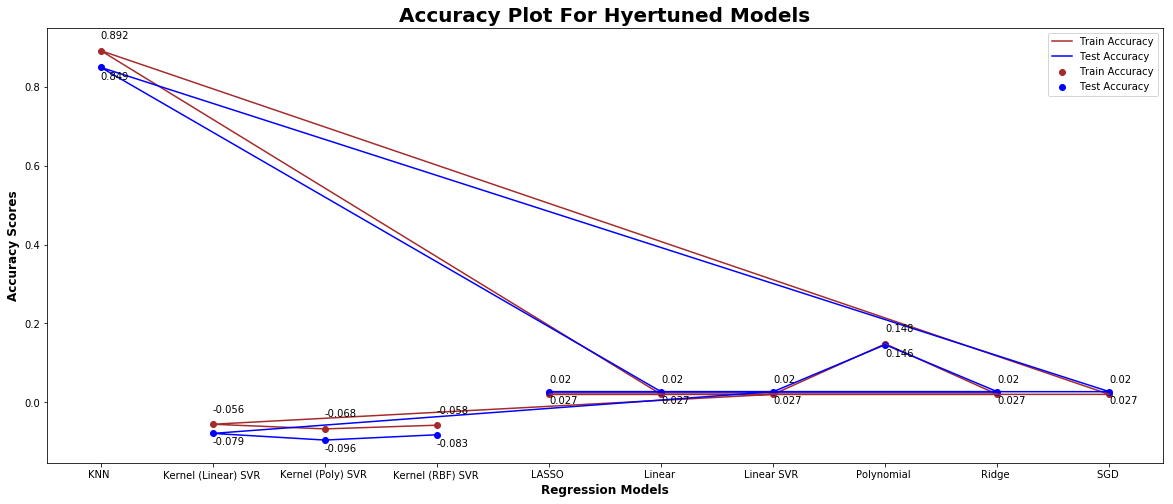

In [72]:
%matplotlib inline
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,facecolor='white')
ax.plot(report['identifier'], report['Train Accuracy'], c = 'brown')
ax.plot(report['identifier'], report['Test Accuracy'], c = 'blue')
ax.scatter(report['identifier'], report['Train Accuracy'], c = 'brown')
ax.scatter(report['identifier'], report['Test Accuracy'], c = 'blue')
for i,j in zip(report['identifier'],round(report['Train Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j+0.03),color='black')
for i,j in zip(report['identifier'],round(report['Test Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.03),color='black')
ax.legend()
ax.set_title('Accuracy Plot For Hyertuned Models',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=12,weight='bold')
ax.set_ylabel('Accuracy Scores',fontsize=12,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

### Deep Learning Model

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.

Neural network is a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs.

Most deep learning methods use neural network architectures, which is why deep learning models are often referred to as deep neural networks.

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [15]:
# Create Model
model = Sequential()
model.add(Dense(13, input_dim=d, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [16]:
#Complile Model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [17]:
#Fit the model
model.fit(X_train_pca, y_train, epochs=100, batch_size=20)

Epoch 1/100
46660/46660 [==============================] - 3s 70us/step - loss: 397304.8179 - mean_squared_error: 397304.8179
Epoch 2/100
46660/46660 [==============================] - 3s 67us/step - loss: 396565.7774 - mean_squared_error: 396565.7774
Epoch 3/100
46660/46660 [==============================] - 3s 66us/step - loss: 396544.0914 - mean_squared_error: 396544.0914
Epoch 4/100
46660/46660 [==============================] - 3s 66us/step - loss: 396500.7076 - mean_squared_error: 396500.7076
Epoch 5/100
46660/46660 [==============================] - 3s 67us/step - loss: 396507.1207 - mean_squared_error: 396507.1207
Epoch 6/100
46660/46660 [==============================] - 3s 66us/step - loss: 396533.8905 - mean_squared_error: 396533.8905
Epoch 7/100
46660/46660 [==============================] - 3s 66us/step - loss: 396547.7287 - mean_squared_error: 396547.7287
Epoch 8/100
46660/46660 [==============================] - 3s 67us/step - loss: 396514.4471 - mean_squared_error: 3965

In [18]:
# Evaluate the Model
scores = model.evaluate(X_test_pca, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11665/11665 [==============================] - 0s 23us/step

mean_squared_error: 26919411.08%


In [19]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_pca)
y_test_predict = model.predict(X_test_pca)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00


Applying Deep Learning model for this regression dataset gives an train and test score of 0 after applying PCA. The MSE is also very high: 26919411 %